In [1]:
import geopandas as gpd
from shapely import ops
from shapely import geometry as geom
import os
import urllib
#from sjoin import sjoin
%matplotlib inline

In [2]:
### GET BOROUGH GEOJSON FILE FROM:
### https://github.com/dwillis/nyc-maps/raw/master/boroughs.geojson
#bb = gpd.read_file('neighborhoods.geojson')
#ng = gpd.read_file('neighborhoods.geojson')
#gpd.

zipgeojson = "https://github.com/YuHuaCheng/Map/raw/master/data/nyc-zip-code-tabulation-areas-polygons.geojson"
#zipgeojson = "https://github.com/dwillis/nyc-maps/raw/master/boroughs.geojson"
zipsfile = os.path.join("data",zipgeojson.split("/")[-1])

try:
    bb = gpd.read_file(zipsfile)
except OSError as e:
    urllib.request.urlretrieve(zipgeojson, zipsfile)
    
    #zips geojson had a var assignment that caused problems
    fin = open(zipsfile)
    
    lines = [line for line in fin]
    lines[0] = lines[0].replace("var nycdata = ", "")
    
    fin.close()
    
    fout = open(zipsfile, "w")
    for line in lines:
        fout.write(line)
    fout.flush()
    fout.close()
    
    bb = gpd.read_file(zipsfile)

bb.geometry

0      POLYGON ((-73.86942457284175 40.74915687096787...
1      POLYGON ((-73.71068374074007 40.75004039450917...
2      POLYGON ((-73.70098278625547 40.73889569923034...
3      POLYGON ((-73.72270447144122 40.75373371438336...
4      POLYGON ((-73.81088634744755 40.72717187575918...
5      POLYGON ((-73.88722098467157 40.72752618766134...
6      POLYGON ((-73.70098278625547 40.73889569923034...
7      POLYGON ((-73.8562474640478 40.7367227854824, ...
8      POLYGON ((-73.74168681424477 40.73682340115314...
9      POLYGON ((-73.86451198956482 40.73407164841783...
10     POLYGON ((-73.77010678596534 40.73177920848852...
11     POLYGON ((-73.77010678596534 40.73177920848852...
12     POLYGON ((-73.72774739596115 40.72258480474807...
13     POLYGON ((-73.80904031652176 40.71991162363268...
14     POLYGON ((-73.87190078471538 40.72685786441028...
15     POLYGON ((-73.72847847282661 40.72076557418165...
16     POLYGON ((-73.826059565848 40.71539860277048, ...
17     POLYGON ((-73.8260595658

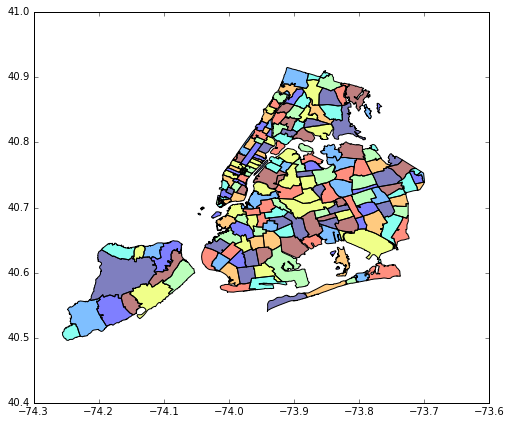

In [3]:
bb.plot(figsize=(14,7))

In [4]:
sum(bb.area)

0.082831966701806731

In [5]:
bb.geometry.convex_hull[1].convex_hull()

TypeError: 'Polygon' object is not callable

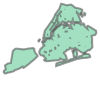

In [6]:
ops.unary_union(bb.geometry.convex_hull)

In [7]:
bb.set_geometry(bb.geometry.buffer(0.01))

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.90634018431233 40.75248892957003...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.72954770397357 40.74626675532193...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.71178925976336 40.73926012523947...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.74120276357796 40.72498367729421...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.82429903352241 40.74313580522933...,11365
5,http://nyc.pediacities.com/Resource/PostalCode...,0,081,6,Elmhurst,NY,36,4.265940e+07,33755.870988,Queens,POLYGON ((-73.90044937635527 40.74020360457705...,11373
6,http://nyc.pediacities.com/Resource/PostalCode...,0,081,7,Floral Park,NY,36,9.155180e+06,13594.924549,Queens,POLYGON ((-73.72058750220677 40.72823574340366...,11001
7,http://nyc.pediacities.com/Resource/PostalCode...,0,081,8,Forest Hills,NY,36,5.558777e+07,36277.076839,Queens,POLYGON ((-73.86651252725906 40.72528828599264...,11375
8,http://nyc.pediacities.com/Resource/PostalCode...,0,081,9,Queens Village,NY,36,3.956834e+07,31231.968593,Queens,POLYGON ((-73.76726929012992 40.71469211756757...,11427
9,http://nyc.pediacities.com/Resource/PostalCode...,0,081,10,Rego Park,NY,36,2.520346e+07,26323.994393,Queens,"POLYGON ((-73.87923766883759 40.7358998651633,...",11374


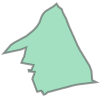

In [8]:
bb.geometry[3]

In [9]:
#gpd.GeoSeries(avg).plot()

In [10]:
avg = avg.convex_hull
gpd.GeoSeries(avg).plot()

NameError: name 'avg' is not defined

In [ ]:
avg

In [ ]:
avg.area

In [ ]:
print avg.centroid

In [11]:
points = [geom.Point(-73.94650690661533, 40.68857526610002)]
gs = gpd.GeoSeries(points)
gd = gpd.GeoDataFrame(geometry=gs)
gs

0    POINT (-73.94650690661533 40.68857526610002)
dtype: object

In [12]:
gd.crs = bb.crs

In [13]:
sjoin(gd, bb, how="left", op="within")

NameError: name 'sjoin' is not defined